In [ ]:
from google.colab import files
files.upload()  # จะให้คุณเลือกไฟล์จากเครื่อง

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pvstww","key":"2a891b6011a4295a46774df4ed376e90"}'}

In [ ]:
!pip install kaggle



In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d birdy654/deep-voice-deepfake-voice-recognition --unzip


Dataset URL: https://www.kaggle.com/datasets/birdy654/deep-voice-deepfake-voice-recognition
License(s): other


In [ ]:
!kaggle datasets download -d syedowaisnawaz/merged-voice-detection --unzip


Dataset URL: https://www.kaggle.com/datasets/syedowaisnawaz/merged-voice-detection
License(s): other


In [ ]:
!kaggle datasets download -d chayuri/deepfake-voice-segmented --unzip


Dataset URL: https://www.kaggle.com/datasets/chayuri/deepfake-voice-segmented
License(s): MIT


In [ ]:
import os

rename_map = {
    "KAGGLE": "data1",
    "processed_audio": "data2",
    "segmented_voices": "data3"
}

base_path = "/content"

for old_name, new_name in rename_map.items():
    old_path = os.path.join(base_path, old_name)
    new_path = os.path.join(base_path, new_name)

    if os.path.exists(old_path):
        if not os.path.exists(new_path):
            os.rename(old_path, new_path)
            print(f"✅ Renamed: {old_name} → {new_name}")
        else:
            print(f"⚠️ Skip: {new_name} already exists")
    else:
        print(f"❌ Not found: {old_name}")


✅ Renamed: KAGGLE → data1
✅ Renamed: processed_audio → data2
✅ Renamed: segmented_voices → data3


In [ ]:
import librosa
import os
import seaborn as sns
import matplotlib.pyplot as plt

# กำหนดเส้นทางไปยังโฟลเดอร์ที่มีไฟล์เสียง
folders = ['/content/data1/AUDIO/FAKE', '/content/data2/FAKE',
           '/content/data3/FAKE', '/content/data1/AUDIO/REAL',
           '/content/data2/REAL', '/content/data3/REAL']

# สร้าง dictionary สำหรับเก็บความยาวของไฟล์เสียงในแต่ละโฟลเดอร์
durations = {'FAKE1': [], 'FAKE2': [], 'FAKE3': [], 'REAL1': [], 'REAL2': [], 'REAL3': []}

# วนลูปผ่านโฟลเดอร์ต่างๆ เพื่อคำนวณความยาวของไฟล์เสียง
for folder, label in zip(folders, durations.keys()):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.wav'):  # ตรวจสอบว่าเป็นไฟล์ .wav
                audio_path = os.path.join(root, file)
                try:
                    y, sr = librosa.load(audio_path, sr=None)  # โหลดไฟล์เสียง
                    duration = librosa.get_duration(y=y, sr=sr)  # คำนวณความยาว (วินาที)
                    durations[label].append(duration)  # เก็บความยาวใน dictionary ตามโฟลเดอร์
                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

<ipython-input-9-6233a05050e8>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels)


ValueError: zero-size array to reduction operation minimum which has no identity

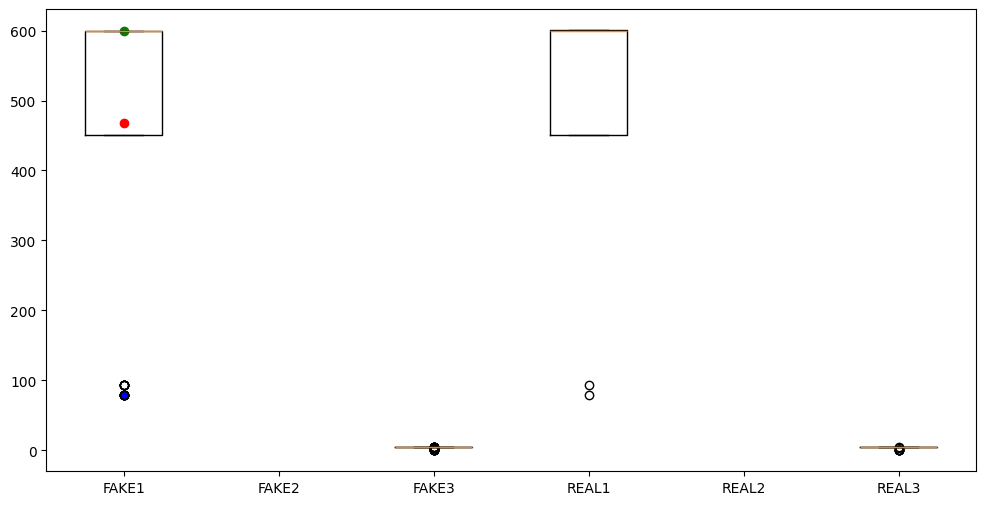

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนด labels สำหรับข้อมูลของ FAKE และ REAL
labels = list(durations.keys())
data = [durations[key] for key in labels]

# สร้างกราฟ Boxplot โดยไม่เติมสี
plt.figure(figsize=(12, 6))
box = plt.boxplot(data, labels=labels)

# เพิ่มจุด min, mean, max
for i, key in enumerate(labels):
    values = durations[key]
    plt.scatter(i + 1, np.min(values), color='blue', label='Min' if i == 0 else "")
    plt.scatter(i + 1, np.mean(values), color='red', label='Mean' if i == 0 else "")
    plt.scatter(i + 1, np.max(values), color='green', label='Max' if i == 0 else "")

# ปรับชื่อและตำนาน
plt.title("Boxplot of Audio Durations (FAKE & REAL)")
plt.ylabel("Duration (Seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# แสดงกราฟ
plt.show()


In [ ]:
!ls /content/data1/AUDIO/FAKE


biden-to-linus.wav   margot-to-taylor.wav  ryan-to-musk.wav
biden-to-margot.wav  margot-to-trump.wav   ryan-to-obama.wav
biden-to-musk.wav    musk-to-biden.wav	   ryan-to-taylor.wav
biden-to-Obama.wav   musk-to-linus.wav	   ryan-to-trump.wav
biden-to-ryan.wav    musk-to-margot.wav    taylor-to-biden.wav
biden-to-taylor.wav  musk-to-obama.wav	   taylor-to-linus.wav
biden-to-Trump.wav   musk-to-ryan.wav	   taylor-to-margot.wav
linus-to-biden.wav   musk-to-taylor.wav    taylor-to-musk.wav
linus-to-margot.wav  musk-to-trump.wav	   taylor-to-obama.wav
linus-to-musk.wav    Obama-to-Biden.wav    taylor-to-ryan.wav
linus-to-obama.wav   obama-to-linus.wav    taylor-to-trump.wav
linus-to-ryan.wav    obama-to-margot.wav   trump-to-Biden.wav
linus-to-taylor.wav  obama-to-musk.wav	   trump-to-linus.wav
linus-to-trump.wav   obama-to-ryan.wav	   trump-to-margot.wav
margot-to-biden.wav  obama-to-taylor.wav   trump-to-musk.wav
margot-to-linus.wav  Obama-to-Trump.wav    trump-to-Obama.wav
margot-to-musk

In [ ]:
!ls /content/data3/REAL


biden-original	margot-original  obama-original  taylor-original
linus-original	musk-original	 ryan-original	 trump-original


In [ ]:
!ls /content/data3/REAL/biden-original


segment_5250.wav  segment_5281.wav  segment_5312.wav  segment_5343.wav
segment_5251.wav  segment_5282.wav  segment_5313.wav  segment_5344.wav
segment_5252.wav  segment_5283.wav  segment_5314.wav  segment_5345.wav
segment_5253.wav  segment_5284.wav  segment_5315.wav  segment_5346.wav
segment_5254.wav  segment_5285.wav  segment_5316.wav  segment_5347.wav
segment_5255.wav  segment_5286.wav  segment_5317.wav  segment_5348.wav
segment_5256.wav  segment_5287.wav  segment_5318.wav  segment_5349.wav
segment_5257.wav  segment_5288.wav  segment_5319.wav  segment_5350.wav
segment_5258.wav  segment_5289.wav  segment_5320.wav  segment_5351.wav
segment_5259.wav  segment_5290.wav  segment_5321.wav  segment_5352.wav
segment_5260.wav  segment_5291.wav  segment_5322.wav  segment_5353.wav
segment_5261.wav  segment_5292.wav  segment_5323.wav  segment_5354.wav
segment_5262.wav  segment_5293.wav  segment_5324.wav  segment_5355.wav
segment_5263.wav  segment_5294.wav  segment_5325.wav  segment_5356.wav
segmen

In [ ]:
!ls /content/data3/FAKE


biden-to-linus	 margot-to-biden   Obama-to-Biden   taylor-to-biden
biden-to-margot  margot-to-linus   obama-to-linus   taylor-to-linus
biden-to-musk	 margot-to-musk    obama-to-margot  taylor-to-margot
biden-to-Obama	 margot-to-obama   obama-to-musk    taylor-to-musk
biden-to-ryan	 margot-to-ryan    obama-to-ryan    taylor-to-obama
biden-to-taylor  margot-to-taylor  obama-to-taylor  taylor-to-ryan
biden-to-Trump	 margot-to-trump   Obama-to-Trump   taylor-to-trump
linus-to-biden	 musk-to-biden	   ryan-to-biden    trump-to-Biden
linus-to-margot  musk-to-linus	   ryan-to-linus    trump-to-linus
linus-to-musk	 musk-to-margot    ryan-to-margot   trump-to-margot
linus-to-obama	 musk-to-obama	   ryan-to-musk     trump-to-musk
linus-to-ryan	 musk-to-ryan	   ryan-to-obama    trump-to-Obama
linus-to-taylor  musk-to-taylor    ryan-to-taylor   trump-to-ryan
linus-to-trump	 musk-to-trump	   ryan-to-trump    trump-to-taylor


In [ ]:
import os
import glob
import random
import shutil
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths
real_root = '/content/data3/REAL'
fake_root = '/content/data3/FAKE'
output_root = '/content/output'

# Get all real and fake files
real_files = glob.glob(f'{real_root}/*/*.wav')
fake_files = glob.glob(f'{fake_root}/*/*.wav')

# Shuffle and balance
min_len = min(len(real_files), len(fake_files))
random.shuffle(real_files)
random.shuffle(fake_files)
real_files = real_files[:min_len]
fake_files = fake_files[:min_len]

# Split 70/15/15
def split_data(files):
    n = len(files)
    train = files[:int(0.7 * n)]
    val = files[int(0.7 * n):int(0.85 * n)]
    test = files[int(0.85 * n):]
    return train, val, test

real_train, real_val, real_test = split_data(real_files)
fake_train, fake_val, fake_test = split_data(fake_files)

# Organize directory
for split, real_list, fake_list in [
    ('train', real_train, fake_train),
    ('val', real_val, fake_val),
    ('test', real_test, fake_test),
]:
    for cls, files in [('real', real_list), ('fake', fake_list)]:
        out_dir = os.path.join(output_root, split, cls)
        os.makedirs(out_dir, exist_ok=True)
        for f in files:
            shutil.copy(f, out_dir)


In [ ]:
!ls /content/output/test/fake | wc -l


114


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define paths
output_spectrogram_dir = '/content/output_spectrograms'

# Define the folders you want to process (train/val/test for both real and fake)
folders = [
    'train/real', 'train/fake',
    'val/real', 'val/fake',
    'test/real', 'test/fake'
]

# Create output directories for spectrograms
for folder in folders:
    os.makedirs(os.path.join(output_spectrogram_dir, folder), exist_ok=True)

# Function to generate and save spectrogram
def generate_spectrogram(wav_file, output_path):
    y, sr = librosa.load(wav_file, sr=None)

    # Generate Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert to log scale (dB)
    S_db = librosa.power_to_db(S, ref=np.max)

    # Plot and save the spectrogram as an image
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(output_path, bbox_inches='tight')
    plt.close()

# Process files and generate spectrograms
for folder in folders:
    input_folder = os.path.join('/content/output', folder)
    spectrogram_folder = os.path.join(output_spectrogram_dir, folder)

    # Process each audio file in the folder
    for wav_file in os.listdir(input_folder):
        if wav_file.endswith('.wav'):
            wav_path = os.path.join(input_folder, wav_file)
            output_path = os.path.join(spectrogram_folder, f'{os.path.splitext(wav_file)[0]}.png')

            # Generate and save spectrogram
            generate_spectrogram(wav_path, output_path)
            print(f'Generated: {output_path}')



Generated: /content/output_spectrograms/train/real/segment_5558.png
Generated: /content/output_spectrograms/train/real/segment_5660.png
Generated: /content/output_spectrograms/train/real/segment_5497.png
Generated: /content/output_spectrograms/train/real/segment_5680.png
Generated: /content/output_spectrograms/train/real/segment_5870.png
Generated: /content/output_spectrograms/train/real/segment_5548.png
Generated: /content/output_spectrograms/train/real/segment_5546.png
Generated: /content/output_spectrograms/train/real/segment_5770.png
Generated: /content/output_spectrograms/train/real/segment_5877.png
Generated: /content/output_spectrograms/train/real/segment_5730.png
Generated: /content/output_spectrograms/train/real/segment_5389.png
Generated: /content/output_spectrograms/train/real/segment_5479.png
Generated: /content/output_spectrograms/train/real/segment_5441.png
Generated: /content/output_spectrograms/train/real/segment_5275.png
Generated: /content/output_spectrograms/train/re

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=144
  warnings.warn(


Generated: /content/output_spectrograms/val/real/segment_5788.png
Generated: /content/output_spectrograms/val/real/segment_5724.png
Generated: /content/output_spectrograms/val/real/segment_5552.png
Generated: /content/output_spectrograms/val/real/segment_5498.png
Generated: /content/output_spectrograms/val/real/segment_5734.png
Generated: /content/output_spectrograms/val/real/segment_5892.png
Generated: /content/output_spectrograms/val/real/segment_5453.png
Generated: /content/output_spectrograms/val/real/segment_5785.png
Generated: /content/output_spectrograms/val/real/segment_5950.png
Generated: /content/output_spectrograms/val/real/segment_5961.png
Generated: /content/output_spectrograms/val/real/segment_5705.png
Generated: /content/output_spectrograms/val/real/segment_5469.png
Generated: /content/output_spectrograms/val/real/segment_5831.png
Generated: /content/output_spectrograms/val/real/segment_5426.png
Generated: /content/output_spectrograms/val/real/segment_5806.png
Generated:

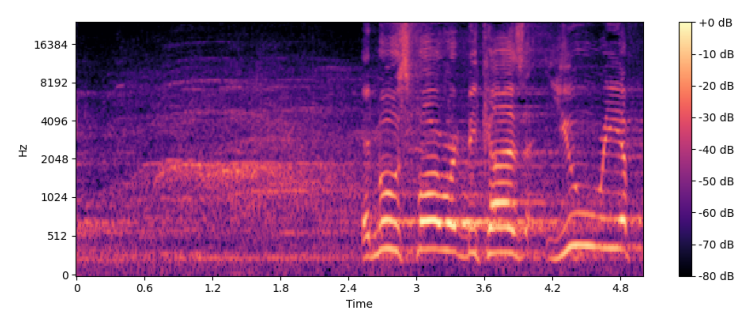

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ของไฟล์
img_path = '/content/output_spectrograms/test/real/segment_5618.png'

# โหลดและแสดงภาพ
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 4))
plt.imshow(img)
plt.axis('off')  # ไม่แสดงแกน
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = '/content/output_spectrograms/train'
val_dir = '/content/output_spectrograms/val'
test_dir = '/content/output_spectrograms/test'

# ImageDataGenerator
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test accuracy: {test_acc:.2f}')


Found 1056 images belonging to 2 classes.
Found 226 images belonging to 2 classes.
Found 228 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 540ms/step - accuracy: 0.5636 - loss: 0.7537 - val_accuracy: 0.6637 - val_loss: 0.5815
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.7406 - loss: 0.5077 - val_accuracy: 0.8407 - val_loss: 0.4072
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - accuracy: 0.8591 - loss: 0.3578 - val_accuracy: 0.8761 - val_loss: 0.2986
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.8991 - loss: 0.2273 - val_accuracy: 0.9204 - val_loss: 0.2345
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.9384 - loss: 0.1571 - val_accuracy: 0.8894 - val_loss: 0.2505
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.9222 - loss: 0.1720 - val_accuracy: 0.8761 - val_loss: 0.2464
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.9615 - loss: 0.1117 - val_accuracy: 0.9115 - val_loss: 0.2506
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.9553 - loss: 0.1086 - val_accu

In [ ]:
model.save('/content/my_model.h5')  # บันทึกโมเดลในไฟล์ .h5


In [ ]:
from tensorflow.keras.models import load_model

# โหลดโมเดลจากไฟล์
model = load_model('/content/my_model.h5')

# ประเมินผลบนชุดข้อมูลทดสอบ
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test accuracy: {test_acc:.2f}')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# ดึงผลลัพธ์จาก history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้าง DataFrame สำหรับเก็บผลลัพธ์
results = {
    'Epoch': [i+1 for i in range(len(train_acc))],
    'Train Accuracy': train_acc,
    'Val Accuracy': val_acc,
    'Train Loss': train_loss,
    'Val Loss': val_loss
}

# สร้าง DataFrame
df_results = pd.DataFrame(results)

# ประเมินผลในชุดทดสอบ
y_true = test_gen.classes  # true labels (0=real, 1=fake)
y_pred_probs = model.predict(test_gen)  # predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # แปลงเป็น 0 หรือ 1

# คำนวณเมตริกสำหรับแต่ละคลาส
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)

# คำนวณค่าเฉลี่ย
precision_avg = precision_score(y_true, y_pred, average='weighted')
recall_avg = recall_score(y_true, y_pred, average='weighted')
f1_avg = f1_score(y_true, y_pred, average='weighted')

# สร้าง confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# เพิ่มผลลัพธ์ใน DataFrame
df_results['Precision (Real)'] = precision[0]
df_results['Recall (Real)'] = recall[0]
df_results['F1-Score (Real)'] = f1[0]
df_results['Precision (Fake)'] = precision[1]
df_results['Recall (Fake)'] = recall[1]
df_results['F1-Score (Fake)'] = f1[1]
df_results['Accuracy'] = accuracy

# แสดงผลลัพธ์ในรูปแบบตาราง
print("Training History:")
print(df_results)

# สรุปผลลัพธ์ทั้งหมด
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Real', 'Fake']))

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=['Actual Real', 'Actual Fake'],
                  columns=['Predicted Real', 'Predicted Fake']))

summary = {
    'Real Voice': {
        'Precision': precision[0],
        'Recall': recall[0],
        'F1-Score': f1[0],
        'Support': tn + fn
    },
    'Fake Voice': {
        'Precision': precision[1],
        'Recall': recall[1],
        'F1-Score': f1[1],
        'Support': tp + fp
    },
    'Overall': {
        'Accuracy': accuracy,
        'Weighted Precision': precision_avg,
        'Weighted Recall': recall_avg,
        'Weighted F1-Score': f1_avg
    }
}

print("\nSummary of Model Evaluation:")
print(pd.DataFrame(summary).transpose())

# สรุปผลลัพธ์แบบกราฟิก
print("\nPerformance Summary:")
print(f"Real Voice Detection:")
print(f"  - Precision: {precision[0]:.2%}  |  Recall: {recall[0]:.2%}  |  F1: {f1[0]:.2%}")
print(f"Fake Voice Detection:")
print(f"  - Precision: {precision[1]:.2%}  |  Recall: {recall[1]:.2%}  |  F1: {f1[1]:.2%}")
print(f"\nOverall Accuracy: {accuracy:.2%}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step
Training History:
   Epoch  Train Accuracy  Val Accuracy  Train Loss  Val Loss  \
0      1        0.626894      0.663717    0.660989  0.581485   
1      2        0.771780      0.840708    0.470488  0.407182   
2      3        0.857008      0.876106    0.341117  0.298645   
3      4        0.907197      0.920354    0.225905  0.234511   
4      5        0.928030      0.889381    0.168012  0.250478   
5      6        0.922348      0.876106    0.169515  0.246419   
6      7        0.962121      0.911504    0.099390  0.250558   
7      8        0.949811      0.920354    0.126954  0.219130   
8      9        0.961174      0.933628    0.086803  0.197381   
9     10        0.982955      0.942478    0.050712  0.207597   

   Precision (Real)  Recall (Real)  F1-Score (Real)  Precision (Fake)  \
0          0.858333       0.903509         0.880342          0.898148   
1          0.858333       0.903509         0.880342          0.898148   
2          0.858333

In [26]:
!apt-get install git -y
!git config --global user.email "pvs.tw07@gmail.com"
!git config --global user.name "pvst07"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [32]:
!ls

README.md


In [33]:
!cp FakeTalkDetector.ipynb repo-name/


cp: cannot stat 'FakeTalkDetector.ipynb': No such file or directory


In [36]:
import os
print(os.listdir('/content/Fake-Talk-Detector-Project'))


['README.md', '.git']


Reinitialized existing Git repository in /content/Fake-Talk-Detector-Project/.git/


fatal: could not read Username for 'https://github.com': No such device or address
